In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# Position of detection stations
R = np.zeros((6,3))
R[0] = np.array([2.0 ,20.0 ,0.0])
R[1] = np.array([-2.0,-1.0 ,0.0])
R[2] = np.array([5.0 ,12.0 ,0.0])
R[3] = np.array([8.0 ,10.0 ,0.0])
R[4] = np.array([5.0 ,-16.0,0.0])
R[5] = np.array([1.0 ,40.0 ,0.0])
# Times of arrival
T = np.array([3.23,3.82,2.27,3.04,5.65,6.57])
print(R,T)

[[  2.  20.   0.]
 [ -2.  -1.   0.]
 [  5.  12.   0.]
 [  8.  10.   0.]
 [  5. -16.   0.]
 [  1.  40.   0.]] [ 3.23  3.82  2.27  3.04  5.65  6.57]


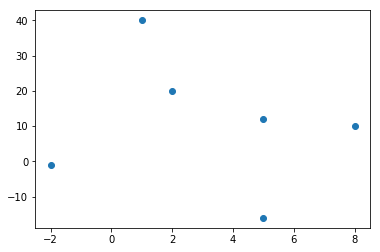

In [4]:
scatter(R.T[0],R.T[1])

In [5]:
# Uncertainty in time, declared velocity
sigmat = 0.05
v      = 5

Let us take the most simple model for the propagation of the sismic wave:

$\left|\vec{r}-\vec{r}_0\right| = vt$

Where $\vec{r}$ is the position in which the wave is detected, $\vec{r}_0$ is the epicenter and $t$ is the time of arrival.

This leads us to the theoretical model for the time:
$t = \left|\vec{r}-\vec{r}_0\right|/v$

Which defines the likelihood:

$$LIKE= \sum \frac{(t_{obs} -t_{theo})^2}{\sigma_t} = \sum \frac{\left(t_{obs} -\frac{\left|\vec{r_{obs}}-\vec{r}_0\right|}{v}\right)^2}{\sigma_t}$$

With this, Hamiltonian is defined with potential related to -log(likelihood)


In [10]:
# x,y,z is r0
def likelihood(x,y,z):
    like = np.sum( T - (1.0/v)*((x-R.T[0])**2+(y-R.T[1])**2+(z-R.T[2])**2))
def loglikelihood(q):
    return -q*q
def gradient_loglikelihood(q):
    return -2*q
def leapfrog(q,p, delta_t=1E-1, niter=5):
    q_new = q
    p_new = p
    for i in range(niter):
        p_new = p_new + 0.5 * delta_t * gradient_loglikelihood(q_new)
        q_new = q_new + delta_t * p_new
        p_new = p_new + 0.5 * delta_t * gradient_loglikelihood(q_new)
    return q_new, p_new

In [9]:
print(Rnorm)

[  12.   12.   75.  192.   75.    3.]
